The first step is the collect data from cache (uct2-xrdcache.mwt2.org).
Shell script (/root/sumup.sh) will produce file state.txt that has to be uploaded into the same directory as this notebook.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [3]:
f=open('/home/ivukotic/workspace/AnalyticsNotebooks/FAX/MWT2 FAX Cache/state.txt',mode='r')
lines=f.readlines()
totFiles=0
totFileSize=0
totBlocks=0
totBlocksDownloaded=0
totFilesComplete=0
totAcc=0
totBytesDisk=0
totBytesRAM=0
totBytesMissed=0

acc=0
hits=[]
partRead=[]

for l in lines:
    l=l.strip()
    l=l.replace(',','')
    l=l.replace('=',' ')
    if l.startswith('version'):
        if acc>0: hits.append(acc)
        acc=0
        w=l.split(" ")
 #       print(w)
        fs = int(w[6])
        nBlocks = int(w[10])
        nDownloaded = int(w[12]) 
        if len(w)==13:
            totFilesComplete+=1 
        totFiles += 1
        totFileSize += fs
        totBlocks += nBlocks
        totBlocksDownloaded += nDownloaded
  #      print(l)

    elif l.startswith('access'):
        acc += 1
        totAcc += 1
        bytesDisk=int(w[8])
        bytesRAM=int(w[10])
        bytesMissed=int(w[12])
        totBytesDisk += bytesDisk
        totBytesRAM  += bytesRAM
        totBytesMissed += bytesMissed
        #print(l)
#    if totFiles>100: break

 
print('totFiles',totFiles)
print('totAcc',totAcc)
print('totFileSize',totFileSize)
print('totFilesComplete',totFilesComplete)
print('totBlocks',totBlocks)
print('totBlocksDownloaded',totBlocksDownloaded)
print('totBytesDisk',totBytesDisk)
print('totBytesRAM',totBytesRAM)
print('totBytesMissed',totBytesMissed)




totFiles 67716
totAcc 102878
totFileSize 103398380272510
totFilesComplete 53837
totBlocks 394466947
totBlocksDownloaded 242348022
totBytesDisk 26968850432
totBytesRAM 622987564
totBytesMissed 404814806


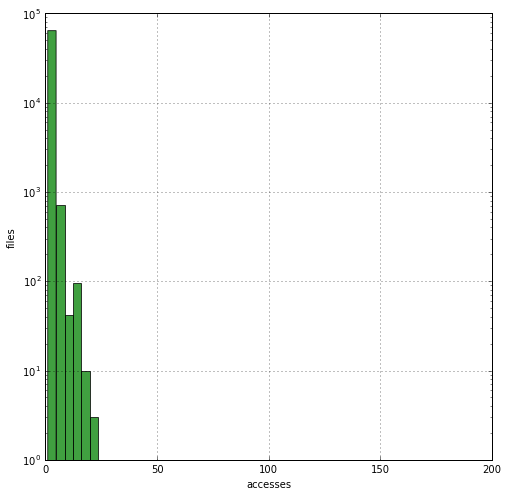

In [12]:
plt.figure(figsize=[8, 8])
gs = gridspec.GridSpec(1, 1)

ax0 = plt.subplot(gs[0])
ax0.hist(hits, 50, normed=0, facecolor='green', alpha=0.75)
ax0.set_yscale('log')
ax0.grid(True)
ax0.set_xlabel('accesses')
ax0.set_ylabel('files')#,rotation='horizontal')
#ax0.xlim(xmax=50)
#ax0.legend()


#ax2 = plt.subplot(gs[1])
plt.show()